<a href="https://colab.research.google.com/github/trighpro123/Kinematic_3dof_robot/blob/main/Kinematic_3dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np

theta1 = []
theta2 = []
theta3 = []
px = []
py = []
alpha = []

l3 = 20
l2 = 40
l1 = 50
dem=0
for i1 in range (0,100):
  for i2 in range (0,180):
    for i3 in range (0,180):
      t1 = i1
      t2 = i2
      t3 = i3
      theta1.append(t1)
      theta2.append(t2)
      theta3.append(t3)
      px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) + l3*cos((t1+t2+t3)*pi/180),2))
      py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) + l3*sin((t1+t2+t3)*pi/180),2))
      alpha.append(t1+t2+t3)
      dem=dem+1
print(dem)
df = DataFrame(np.c_[theta1,theta2,theta3,px,py,alpha],columns = ['theta1','theta2','theta3','px','py','alpha'])
export_csv = df.to_csv (r'Kinematic_3dof.csv',index=None, header=True) ## Cho phép có header, index=none là ko có index

3240000


In [ ]:
##################### TẢI DỮ LIỆU LÊN
# Vì cái lưu file csv của python bị ngu nên phải lưu file xlsx rồi đem về excel chuyển thành csv

import pandas as pd
data = pd.read_csv('Kinematic_3dof.csv')
data.head(182)

## Tìm số lớn nhất
#max(data['Px'])

,theta1,theta2,theta3,px,py,alpha
0,0.0,0.0,0.0,110.00,0.00,0.0
1,0.0,0.0,1.0,110.00,0.35,1.0
2,0.0,0.0,2.0,109.99,0.70,2.0
3,0.0,0.0,3.0,109.97,1.05,3.0
4,0.0,0.0,4.0,109.95,1.40,4.0
...,...,...,...,...,...,...
177,0.0,0.0,177.0,70.03,1.05,177.0
178,0.0,0.0,178.0,70.01,0.70,178.0
179,0.0,0.0,179.0,70.00,0.35,179.0
180,0.0,1.0,0.0,109.99,1.05,1.0


In [ ]:
#Scale du lieu
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler

X= data.drop(['theta1','theta2','theta3'], axis=1)
y = data.drop(['px','py','alpha'], axis=1)
col_names = list(X.columns)

s_scaler = StandardScaler() ############## Standardization giả định các quan sát có phân phối Gaussian (dạng hình chuông)
X_df = s_scaler.fit_transform(X) ### Nếu phân phối dữ liệu không có dạng phân phối chuẩn thì việc áp dụng standardize cũng không hiệu quả.

#scaler = MinMaxScaler()
#X_df = scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
print(X_df.describe().T)
# X_df.head(50)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


,count,mean,std,min,25%,50%,75%,max
px,3240000.0,3.403225e-15,1.0,-2.336356,-0.678639,-0.091889,0.560506,3.222293
py,3240000.0,2.627869e-15,1.0,-2.158820,-0.775698,-0.023388,0.750506,2.342506
alpha,3240000.0,1.239749e-18,1.0,-2.894241,-0.715644,0.000000,0.715644,2.894241


In [ ]:
###############                         TRAINING

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils

#Tạo mo hình 
model=Sequential()
model.add(Dense(64,kernel_initializer='normal',activation='relu',input_shape=(3,)))
#model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.2))
# model.add(Dense(2,activation='softmax'))
# model.add(Dropout(0.2))
model.add(Dense(3))
model.summary()


model.compile(loss='mse',optimizer=RMSprop(),metrics=['mean_absolute_error']) # máy sẽ tự hướng dẫn theo MSE
history=model.fit(X_train,y_train,batch_size=256,epochs=150,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 

# SAVE
model.save("kinematic_robot_3dof_weights.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                256       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
7594/7594 [==============================] - 32s 4ms/step - loss: 348.6308 - mean_absolute_error: 13.3879 - val_loss: 288.8732 - val_mean_absolute_error: 13.4870
Epoch 2/150
7594/7594 [==============================] - 31s 4ms/step - loss: 146.1497 - mean_absolute_error: 9.1624 - val_loss: 67.3144 - val

    tested t1  tested t2  tested t3  predicted t1  predicted t2  predicted t3
0        28.0      143.0      141.0     29.461563    143.762833    139.887177
1        96.0      105.0       23.0     97.785286    102.048798     25.678541
2        54.0       77.0      108.0     54.673828     75.964195    109.403381
3        82.0      121.0       15.0     82.369980    118.052521     18.953043
4         7.0      103.0      144.0      7.680427    102.804054    144.353241
5        70.0       88.0       89.0     70.731903     86.731201     90.961792
6        25.0       71.0       34.0     25.264790     68.783432     34.229618
7        69.0       12.0       10.0     73.819374      0.103877     16.917231
8        74.0       75.0       16.0     75.530037     71.563446     17.306120
9        72.0      162.0      174.0     69.864120    164.064362    175.670074
10       60.0       85.0       18.0     60.010300     82.360893     19.327066
11       51.0      144.0       75.0     51.916725    143.494858 

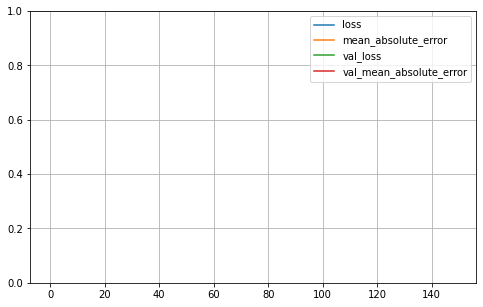

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Unrecognized location 'upperleft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


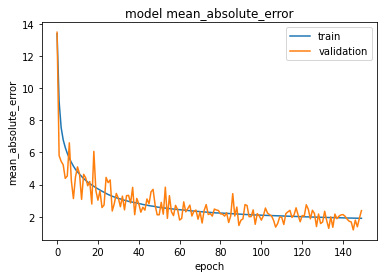

In [ ]:
y_pred = model.predict(X_test)
cal = pd.DataFrame(np.c_[y_test, y_pred],columns = ['tested t1','tested t2','tested t3','predicted t1','predicted t2','predicted t3'])
print(cal.head(50))

# #Vẽ biểu đồ DỰ ĐOÁN
# plt.figure()
# plt.plot(y_pred['t1'],'r',linewidth=1.5,label='Predict')
# plt.plot(y_test['t1'],'b',linewidth=1.5,label='Test')
# y_pred

# # Vẽ đồ thị bằng plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upperleft')
plt.show()

